In [3]:
# 주피터 노트북 환경설정
import warnings
warnings.filterwarnings('ignore')
warnings.simplefilter('ignore')

from IPython.display import set_matplotlib_formats
set_matplotlib_formats("retina")

from IPython.core.display import display, HTML
# display(HTML("<style>.container { font-weight: bold !important; font-family:'Malgun Gothic' !important;}</style>"))
#display(HTML("<style>.container { font-weight: bold !important;}</style>"))
#display(HTML("<style>.container { width: 98% !important; }</style>"))

In [4]:
import numpy as np
import pandas as pd
import os

import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

# 관련 라이브러리 임포트 
import matplotlib.font_manager as fm

#  한글글꼴로 변경
# plt.rcParams['font.family'] = '한글글꼴명'
plt.rcParams['font.size'] = 11.0
# plt.rcParams['font.family'] = 'batang'
plt.rcParams['font.family'] = 'Malgun Gothic'

# 그래프에서 마이너스 폰트 깨지는 문제에 대한 대처
matplotlib.rcParams['axes.unicode_minus'] = False

# 그래프 기본 크기 설정 
plt.rcParams['figure.figsize'] = [10, 6]

# 피처 스케일링

- 두 특성(길이와 무게)의 값이 놓인 범위가 다르다. => 스케일(Scale)이 다르다 라고 한다. 
- 방의 넓이를 재는데 한사람은 cm, 다른사람은 inch로 재는것과 같다. 
- k-최근접 이웃 알고리즘은 샘플간의 거리에 영향을 많이 받는다. 반면 결정트리와 같은 알고리즘의 경우에는 스케일링에 그다지 많은 영향을 받지는 않는다
- 표준점수(Standard Score) 
    - z 점수는 각 특성값이 0에서 표준편차의 몇배만큼 떨어져 있는지 표시한다. 
    - 실제 특성값의 크기와 상관없이 동일한 조건으로 비교할 수 있다. 
    - 각 데이터가 원점에서 몇 표준편차만큼 떨어져 있는지 나타낸다.
- 분산 : 데이터에서 평균을 뺀 값을 모두 제곱한 다음 평균을 내어 구한다. 
- 표준편차 : 분산의 제곱근으로 데이터가 분산된 정도를 나타낸다. 

### 표준화와 정규화 
- 표준화는 데이타의 피처 각각이 평균이 0이고 분산이 1인 가우시안 정규 분포를 가진 값으로 변환하는 것을 의미한다. 
- 정규화란 서로 다른 피처의 크기를 통일하기 위해 크기를 변환해주는 개념이다. 

# 도미와 빙어 (스케일링 예시)

- 스케일링에 따른 모델의 성능 테스트 

#### 데이타수집
http://bit.ly/bream_smelt

In [5]:
#35 도미 + 14 빙어 길이(cm)
fish_length = [25.4, 26.3, 26.5, 29.0, 29.0, 29.7, 29.7, 30.0, 30.0, 30.7, 31.0, 31.0, 
                31.5, 32.0, 32.0, 32.0, 33.0, 33.0, 33.5, 33.5, 34.0, 34.0, 34.5, 35.0, 
                35.0, 35.0, 35.0, 36.0, 36.0, 37.0, 38.5, 38.5, 39.5, 41.0, 41.0, 9.8, 
                10.5, 10.6, 11.0, 11.2, 11.3, 11.8, 11.8, 12.0, 12.2, 12.4, 13.0, 14.3, 15.0]

#35 도미 + 14 빙어 무게(g)
fish_weight = [242.0, 290.0, 340.0, 363.0, 430.0, 450.0, 500.0, 390.0, 450.0, 500.0, 475.0, 500.0, 
                500.0, 340.0, 600.0, 600.0, 700.0, 700.0, 610.0, 650.0, 575.0, 685.0, 620.0, 680.0, 
                700.0, 725.0, 720.0, 714.0, 850.0, 1000.0, 920.0, 955.0, 925.0, 975.0, 950.0, 6.7, 
                7.5, 7.0, 9.7, 9.8, 8.7, 10.0, 9.9, 9.8, 12.2, 13.4, 12.2, 19.7, 19.9]

In [6]:
len(fish_length), len(fish_weight)

(49, 49)

In [7]:
#35 도미 -> 1, 14 빙어 -> 0 = 49
fish_target = np.concatenate((np.ones(35), np.zeros(14)))
fish_target.shape

(49,)

In [8]:
#데이터프레임화
#빈 데이터프레임 생성
fish_data = pd.DataFrame(columns=['fish_length', 'fish_weight', 'label'])

fish_data['fish_length'] = fish_length
fish_data['fish_weight'] = fish_weight
fish_data['label'] = fish_target

fish_data.sample(5)

,fish_length,fish_weight,label
18,33.5,610.0,1.0
45,12.4,13.4,0.0
15,32.0,600.0,1.0
43,12.0,9.8,0.0
25,35.0,725.0,1.0


In [9]:
fish_data.columns

Index(['fish_length', 'fish_weight', 'label'], dtype='object')

In [13]:
#도미
fish_data.iloc[:35, :]

,fish_length,fish_weight,label
0,25.4,242.0,1.0
1,26.3,290.0,1.0
2,26.5,340.0,1.0
3,29.0,363.0,1.0
4,29.0,430.0,1.0
5,29.7,450.0,1.0
6,29.7,500.0,1.0
7,30.0,390.0,1.0
8,30.0,450.0,1.0
9,30.7,500.0,1.0


In [12]:
#빙어
fish_data.iloc[35:, :]

,fish_length,fish_weight,label
35,9.8,6.7,0.0
36,10.5,7.5,0.0
37,10.6,7.0,0.0
38,11.0,9.7,0.0
39,11.2,9.8,0.0
40,11.3,8.7,0.0
41,11.8,10.0,0.0
42,11.8,9.9,0.0
43,12.0,9.8,0.0
44,12.2,12.2,0.0


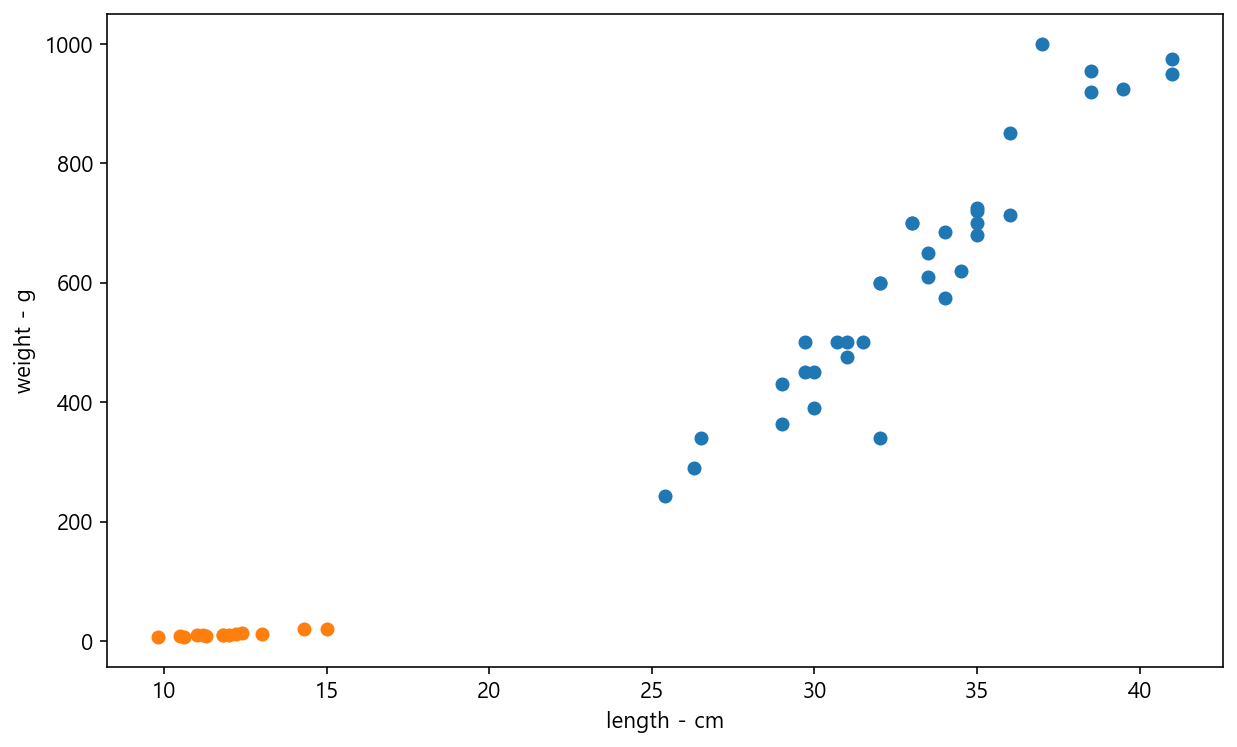

In [14]:
#시각화
plt.scatter(fish_data.iloc[:35, 0], fish_data.iloc[:35, 1]) # 도미 
plt.scatter(fish_data.iloc[35:, 0], fish_data.iloc[35:, 1]) # 빙어 
plt.xlabel('length - cm')
plt.ylabel('weight - g')
plt.show()

In [15]:
#학습데이터와 테스트데이터 분리
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(fish_data[['fish_length', 'fish_weight']] , fish_data['label'] , 
                                                    test_size=0.2, random_state=11, stratify=fish_data['label'])

In [ ]:
#X 데이터
fish_data[['fish_length', 'fish_weight']]
#y 데이터
fish_data['label']

In [16]:
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(39, 2) (39,)
(10, 2) (10,)


In [17]:
#모델 선정 및 학습
from sklearn.neighbors import KNeighborsClassifier

model_kn = KNeighborsClassifier()
model_kn.fit(X_train, y_train)

model_kn.score(X_test, y_test)

1.0

### KNeighborsClassifier 의 주요 메서드 및 속성

In [18]:
print(dir(KNeighborsClassifier))

['__abstractmethods__', '__class__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__getstate__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__setstate__', '__sizeof__', '__str__', '__subclasshook__', '__weakref__', '_abc_impl', '_check_algorithm_metric', '_check_n_features', '_estimator_type', '_fit', '_get_param_names', '_get_tags', '_kneighbors_reduce_func', '_more_tags', '_pairwise', '_repr_html_', '_repr_html_inner', '_repr_mimebundle_', '_validate_data', 'fit', 'get_params', 'kneighbors', 'kneighbors_graph', 'predict', 'predict_proba', 'score', 'set_params']


In [19]:
model_kn.get_params()

{'algorithm': 'auto',
 'leaf_size': 30,
 'metric': 'minkowski',
 'metric_params': None,
 'n_jobs': None,
 'n_neighbors': 5,
 'p': 2,
 'weights': 'uniform'}

In [20]:
#테스트 입력 데이터
print(X_test)
#테스트 입력 데이터 적용시 예측 -> 답안 리스트
print(model_kn.predict(X_test))
#임의 선정 테스트 입력 데이터 적용시 예측 -> 답안 1개 리스트
print(model_kn.predict([[9.8,6.7]]))
#임의 선정 테스트 입력 데이터 적용시 예측되는 확률 -> 타깃의 라벨갯수로 구성된 리스트
print(model_kn.predict_proba([[9.8,6.7]]))

    fish_length  fish_weight
4          29.0        430.0
35          9.8          6.7
7          30.0        390.0
46         13.0         12.2
5          29.7        450.0
21         34.0        685.0
44         12.2         12.2
1          26.3        290.0
10         31.0        475.0
12         31.5        500.0
[1. 0. 1. 0. 1. 1. 0. 1. 1. 1.]
[0.]
[[1. 0.]]


In [ ]:

print(model_kn.score(X_test, y_test))

In [22]:
#이웃찾기 메서드 -> 이웃과의 거리, 이웃의 인덱스
#모델명.kneighbors([[값1, 값2, ...]])
model_kn.kneighbors([[26.3,290.0]])

print(model_kn.kneighbors([[26.3,290.0]]))

#이웃의 거리와 이웃의 인덱스를 변도 변수로 저장
distance, indexes = model_kn.kneighbors([[26.3,290.0]])

print(f'distance = {distance}')
print(f'indexes = {indexes}')

(array([[ 48.00843676,  50.0004    ,  50.3238512 ,  73.04991444,
        160.04277553]]), array([[20, 21,  9, 29, 17]], dtype=int64))
distance = [[ 48.00843676  50.0004      50.3238512   73.04991444 160.04277553]]
indexes = [[20 21  9 29 17]]


In [25]:
#2차원 -> 1차원 flatten()
indexes.shape, indexes.flatten().shape

((1, 5), (5,))

In [26]:
#이웃점들의 길이, 무게 데이터
X_train.iloc[indexes.flatten(), 0], X_train.iloc[indexes.flatten(), 1]

(0     25.4
 2     26.5
 13    32.0
 3     29.0
 8     30.0
 Name: fish_length, dtype: float64,
 0     242.0
 2     340.0
 13    340.0
 3     363.0
 8     450.0
 Name: fish_weight, dtype: float64)

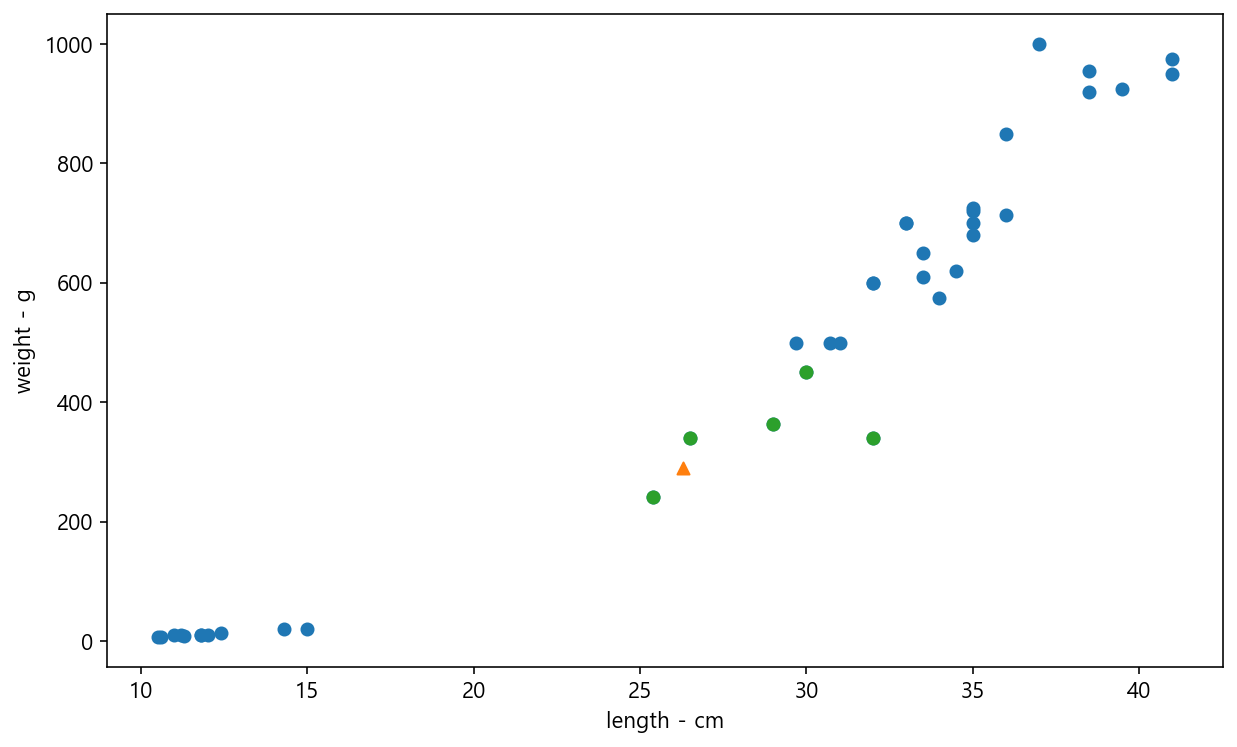

In [27]:
#지정한 데이터에 대한 이웃점 시각화
#전체
plt.scatter(X_train['fish_length'], X_train['fish_weight'])
#특정 데이터
plt.scatter(26.3,290.0, marker='^')
#특정 데이터의 이웃
plt.scatter(X_train.iloc[indexes.flatten(), 0], X_train.iloc[indexes.flatten(), 1])

plt.xlabel('length - cm')
plt.ylabel('weight - g')
plt.show()

#### 테스트에 없는 새로운 데이타로 테스트 


In [29]:
#도미로 예측되는 입력값을 예측 메서드 적용
#빙어로 나옴
print(model_kn.predict([[25, 150]]))

[0.]


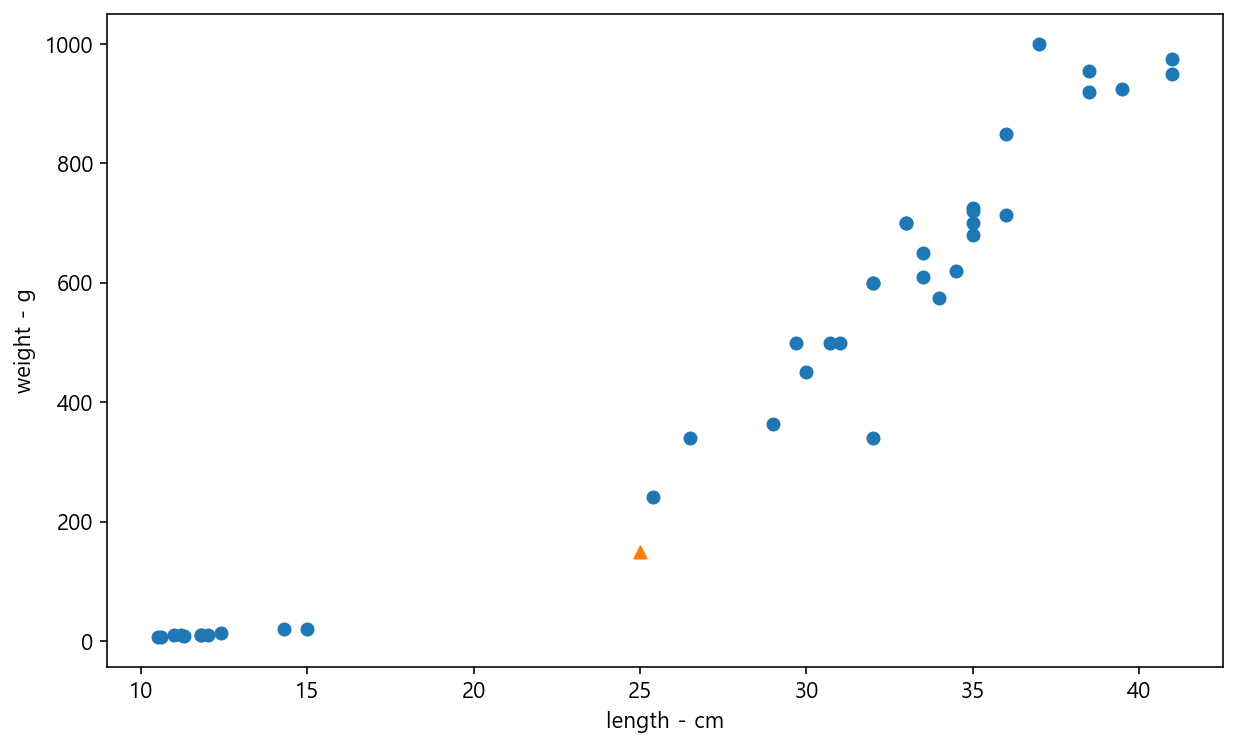

In [30]:
#시각화
plt.scatter(X_train['fish_length'], X_train['fish_weight'])

#새로운 데이터
plt.scatter(25, 150, marker='^')

plt.xlabel('length - cm')
plt.ylabel('weight - g')
plt.show()

In [31]:
#이웃 찾기
distances, indexes = model_kn.kneighbors([[25, 150]])
distances, indexes

(array([[ 92.00086956, 130.48375378, 130.73859415, 137.17988191,
         140.62090883]]),
 array([[20, 37, 38, 33, 27]], dtype=int64))

In [32]:
#이웃의 인덱스 적용
print(X_train.iloc[[20, 37, 38, 33, 27]])

    fish_length  fish_weight
0          25.4        242.0
48         15.0         19.9
47         14.3         19.7
45         12.4         13.4
41         11.8         10.0


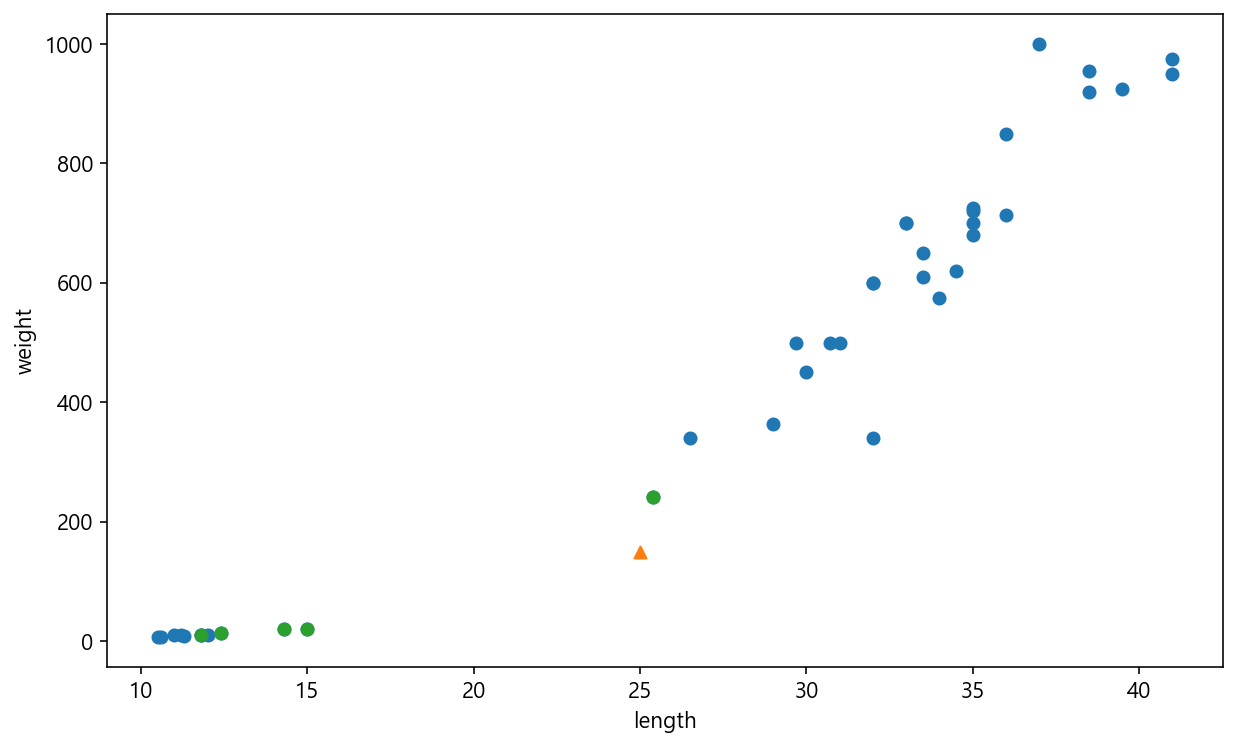

In [33]:
#전체
plt.scatter(X_train['fish_length'], X_train['fish_weight'])

#새로운 테스트용 데이터 (테스트 데이터에 없음)
plt.scatter(25, 150, marker='^')

#이웃의 데이터
plt.scatter(X_train.iloc[indexes.flatten(), 0], X_train.iloc[indexes.flatten(), 1])
# plt.scatter(X_train.iloc[20, 0], X_train.iloc[20, 1], marker='D', color='r')
# plt.scatter(X_train.iloc[37, 0], X_train.iloc[37, 1], marker='D', color='r')
# plt.scatter(X_train.iloc[38, 0], X_train.iloc[38, 1], marker='D', color='r')
# plt.scatter(X_train.iloc[33, 0], X_train.iloc[33, 1], marker='D', color='r')
# plt.scatter(X_train.iloc[27, 0], X_train.iloc[27, 1], marker='D', color='r')

plt.xlabel('length')
plt.ylabel('weight')
plt.show()



In [34]:
print(distances)

[[ 92.00086956 130.48375378 130.73859415 137.17988191 140.62090883]]


In [35]:
#스케일링
#평균 및 표준편차
mean = np.mean(X_train, axis=0)
std = np.std(X_train, axis=0)
print(mean, '\n')
print(std)

fish_length     27.671795
fish_weight    475.112821
dtype: float64 

fish_length     10.379416
fish_weight    338.837654
dtype: float64


In [37]:
X_train.describe()

,fish_length,fish_weight
count,39.000000,39.000000
mean,27.671795,475.112821
std,10.515101,343.267093
min,10.500000,7.000000
25%,14.650000,19.800000
50%,32.000000,575.000000
75%,35.000000,707.000000
max,41.000000,1000.000000


In [38]:
#(데이터 - 평균) / 표준편차
X_train_scaled = (X_train - mean) / std
X_train_scaled.head(3)

,fish_length,fish_weight
20,0.609688,0.294794
42,-1.529161,-1.372967
6,0.195406,0.073449


## 전처리 데이터로 모델 훈련하기

In [39]:
#테스트 데이터 스케일링
new = ([25, 150] - mean) / std
new

fish_length   -0.257413
fish_weight   -0.959494
dtype: float64

In [40]:
#재학습
model_kn.fit(X_train_scaled, y_train)

KNeighborsClassifier()

In [41]:
#테스트용 데이터 스케일링
X_test_scaled = (X_test - mean) / std

In [42]:
X_test_scaled.sample(3)

,fish_length,fish_weight
21,0.609688,0.619433
7,0.224310,-0.251191
10,0.320654,-0.000333


In [43]:
model_kn.score(X_test_scaled, y_test)

1.0

In [44]:
#스케일링 후의 결화
#빙어 -> 도미
print(model_kn.predict([new]))

[1.]


In [45]:
#이웃 찾기
distances, indexes = model_kn.kneighbors([new])
distances, indexes 

(array([[0.27423776, 0.57906392, 0.73734587, 0.87707531, 1.00794545]]),
 array([[20, 21, 29,  9, 17]], dtype=int64))

In [ ]:
#스케일링 이전 : [[20, 37, 38, 33, 27]]
#스케일링 이후 : [[20, 21, 29,  9, 17]]

In [46]:
indexes.flatten()

array([20, 21, 29,  9, 17], dtype=int64)

In [47]:
X_train_scaled.iloc[indexes.flatten()]

,fish_length,fish_weight
0,-0.218875,-0.687978
2,-0.112896,-0.398754
3,0.127965,-0.330875
13,0.416999,-0.398754
8,0.224310,-0.074115


In [49]:
type(new)
new

fish_length   -0.257413
fish_weight   -0.959494
dtype: float64

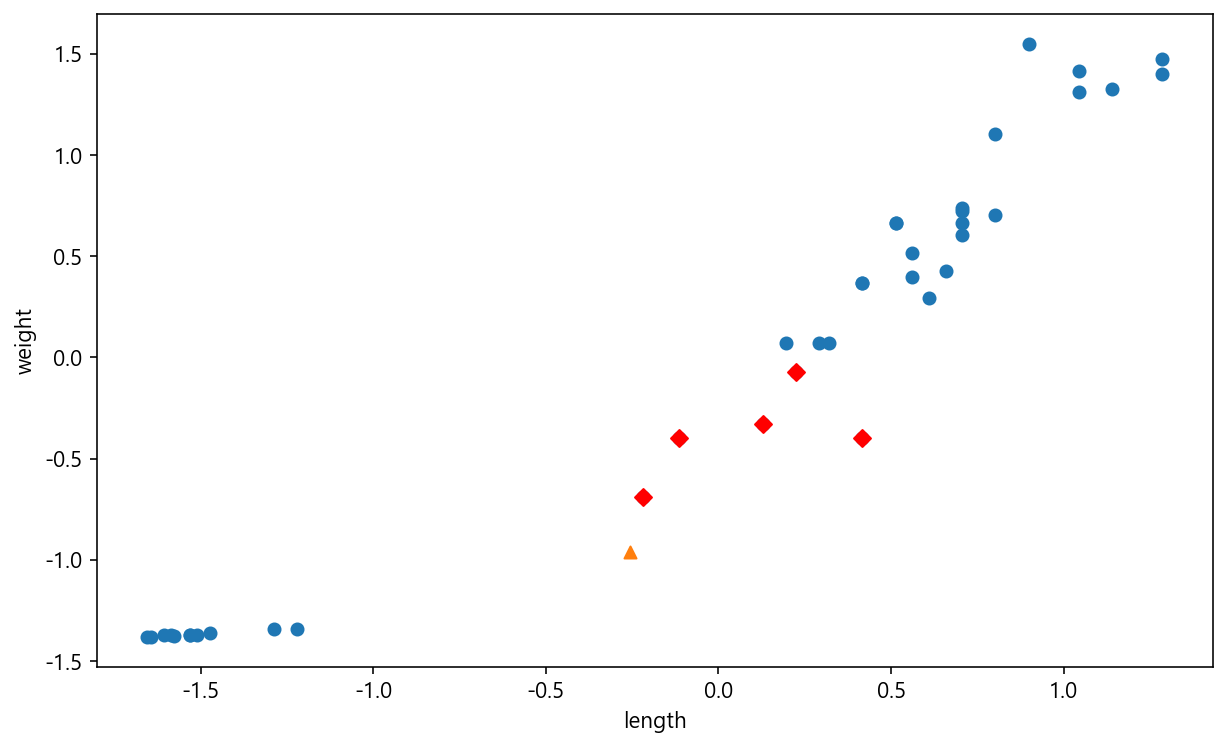

In [48]:
#스케일링 후 시각화 [25, 150]
plt.scatter(X_train_scaled['fish_length'], X_train_scaled['fish_weight'])
plt.scatter(new[0], new[1], marker='^')

#이웃
plt.scatter(X_train_scaled.iloc[indexes.flatten(), 0], X_train_scaled.iloc[indexes.flatten(), 1], marker='D', color='r')

plt.xlabel('length')
plt.ylabel('weight')
plt.show()

In [50]:
#이웃의 라벨값
print(y_train.iloc[indexes.flatten()])

0     1.0
2     1.0
3     1.0
13    1.0
8     1.0
Name: label, dtype: float64


# ** skitlearn의 이용 - 스케일링 **

### StandardScaler 
- 평균이 0이고 분산이 1인 정규분포 형태로 변환

```
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(Data)
Data_scaled = scaler.transform(Data)
```

### MinMaxScaler

- 데이타값을 0과 1 사이의 범위값으로 변환한다. 음수값이 있으면 -1에서 1값으로 변환한다 

```
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaler.fit(Data)
Data_scaled = scaler.transform(Data)
```



## iris 붓꽃 데이타셋으로 스케일링 실습

In [51]:
#붓꽃 데이터셋 -> 데이터프레임
from sklearn.datasets import load_iris

iris = load_iris()
iris_data = iris.data
iris_df = pd.DataFrame(data=iris_data, columns=iris.feature_names)
iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [53]:
#스케일링
from sklearn.preprocessing import StandardScaler

#스케일러 객체 생성
scaler = StandardScaler()

#스케일러에 데이터 입력
scaler.fit(iris_df)

#transform() 메서드를 이용해 스케일된 데이터를 별도 변수에 저장
#데이터프레임 -> 넘파이 배열
iris_scaled = scaler.transform(iris_df)

type(iris_scaled)

# 아래는 에러 발생 => 넘파이 배열이 됐기에 head 출력 불가
# iris_scaled.head()

numpy.ndarray

In [55]:
#데이터프레임 형태로 변형
iris_df_scaled = pd.DataFrame(data=iris_scaled, columns=iris.feature_names)
print('feature 들의 평균 값')
print(iris_df_scaled.mean())
print('\nfeature 들의 분산 값')
print(iris_df_scaled.var())

iris_df_scaled.head(5)

feature 들의 평균 값
sepal length (cm)   -1.690315e-15
sepal width (cm)    -1.842970e-15
petal length (cm)   -1.698641e-15
petal width (cm)    -1.409243e-15
dtype: float64

feature 들의 분산 값
sepal length (cm)    1.006711
sepal width (cm)     1.006711
petal length (cm)    1.006711
petal width (cm)     1.006711
dtype: float64


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,-0.900681,1.019004,-1.340227,-1.315444
1,-1.143017,-0.131979,-1.340227,-1.315444
2,-1.385353,0.328414,-1.397064,-1.315444
3,-1.506521,0.098217,-1.283389,-1.315444
4,-1.021849,1.249201,-1.340227,-1.315444


In [56]:
#y 타겟값 생성
iris_label = iris.target
print('iris target값:', iris_label)
print('iris target명:', iris.target_names)

iris target값: [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]
iris target명: ['setosa' 'versicolor' 'virginica']


In [57]:
#X 데이터 -> 스케일링된 데이터프레임
#y 타겟 -> 넘파이 배열
X_train, X_test, y_train, y_test = train_test_split(iris_df_scaled, iris_label, 
                                                    test_size=0.2, random_state=11)

In [58]:
len(X_train), len(X_test)

(120, 30)

In [59]:
X_train[:3]

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,-0.900681,1.019004,-1.340227,-1.315444
120,1.280340,0.328414,1.103783,1.448832
122,2.249683,-0.592373,1.672157,1.053935


In [60]:
#학습기 선정해서 학습
model_kn = KNeighborsClassifier()
#model_kn = KNeighborsClassifier(n_neighbors=7)
#이웃값 홀수 단위로 변경 가능

model_kn.fit(X_train, y_train)

KNeighborsClassifier()

In [61]:
model_kn.get_params()

{'algorithm': 'auto',
 'leaf_size': 30,
 'metric': 'minkowski',
 'metric_params': None,
 'n_jobs': None,
 'n_neighbors': 5,
 'p': 2,
 'weights': 'uniform'}

In [62]:
#평가
#train 데이터라 하더라도 꼭 1이 나오진 않음 (모의고사 개념)
model_kn.score(X_train, y_train), model_kn.score(X_test, y_test)

(0.9666666666666667, 0.9333333333333333)

In [63]:
model_kn.predict(X_test)

array([2, 2, 1, 1, 2, 0, 1, 0, 0, 1, 1, 1, 1, 2, 2, 0, 2, 1, 2, 2, 1, 0,
       0, 1, 0, 0, 2, 1, 0, 1])

In [64]:
y_test

array([2, 2, 2, 1, 2, 0, 1, 0, 0, 1, 2, 1, 1, 2, 2, 0, 2, 1, 2, 2, 1, 0,
       0, 1, 0, 0, 2, 1, 0, 1])

In [65]:
from sklearn.metrics import accuracy_score
print('예측 정확도: {0:.4f}'.format(accuracy_score(y_test, model_kn.predict(X_test))))

예측 정확도: 0.9333


## MinMaxScaler 적용하면 차이가 있을까?

데이타값을 0과 1 사이의 범위값으로 변환한다. 음수값이 있으면 -1에서 1값으로 변환한다 

In [66]:
from sklearn.preprocessing import MinMaxScaler

In [67]:
#데이터셋 생성
iris = load_iris()
iris_data = iris.data
iris_df = pd.DataFrame(data=iris_data, columns=iris.feature_names)

print('feature들의 최소 값')
print(iris_df.min())
print('\nfeature들의 최대 값')
print(iris_df.max())
print('\n'*2)

#스케일러 객체 생성
scaler = MinMaxScaler()
#데이터 입력
scaler.fit(iris_df)
#변형된 데이터를 변수에 저장 -> 넘파이 배열
iris_scaled2 = scaler.transform(iris_df)

#데이터프레임화
iris_df_scaled2 = pd.DataFrame(data=iris_scaled2, columns=iris.feature_names)
print('feature들의 최소 값')
print(iris_df_scaled2.min())
print('\nfeature들의 최대 값')
print(iris_df_scaled2.max())


feature들의 최소 값
sepal length (cm)    4.3
sepal width (cm)     2.0
petal length (cm)    1.0
petal width (cm)     0.1
dtype: float64

feature들의 최대 값
sepal length (cm)    7.9
sepal width (cm)     4.4
petal length (cm)    6.9
petal width (cm)     2.5
dtype: float64



feature들의 최소 값
sepal length (cm)    0.0
sepal width (cm)     0.0
petal length (cm)    0.0
petal width (cm)     0.0
dtype: float64

feature들의 최대 값
sepal length (cm)    1.0
sepal width (cm)     1.0
petal length (cm)    1.0
petal width (cm)     1.0
dtype: float64


In [68]:
iris_df_scaled.head(5)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,-0.900681,1.019004,-1.340227,-1.315444
1,-1.143017,-0.131979,-1.340227,-1.315444
2,-1.385353,0.328414,-1.397064,-1.315444
3,-1.506521,0.098217,-1.283389,-1.315444
4,-1.021849,1.249201,-1.340227,-1.315444


In [70]:
#y 라벨 생성
iris_label = iris.target

#학습 데이터와 테스트 데이터 분리
X_train, X_test, y_train, y_test = train_test_split(iris_df_scaled2, iris_label, 
                                                    test_size=0.2, random_state=11)

In [71]:
#학습기에 학습시킴
model_kn = KNeighborsClassifier()

model_kn.fit(X_train, y_train)

KNeighborsClassifier()

In [ ]:
# StandardScaler() 적용시 값 
# 0.9666666666666667, 0.9333333333333333

In [72]:
# MinMaxScaler() 적용시 값 
#0.975, 0.9333333333333333
model_kn.score(X_train, y_train), model_kn.score(X_test, y_test)

(0.975, 0.9333333333333333)

In [73]:
#틀린 갯수
len(y_test[y_test != model_kn.predict(X_test)])

2

## 스케일링 변환시 주의 사항 

- 가능하다면 전체 데이터의 스케일링 변환을 적용한 뒤 학습과 테스트 데이터로 분리한다. 
- 1이 여의치 않다면 테스트 데이터 변환시에는 fit()을 적용하지 않고 
<br>학습 데이터로 이미 fit()된 Scaler 객체를 이용해 transform() 으로 변경한다. 

In [78]:
train_array = np.arange(0, 11).reshape(-1, 1)
test_array = np.arange(0, 6).reshape(-1, 1)

print(train_array)
print()
print(test_array)
print()
print(train_array.ndim, test_array.ndim)
print()
print(train_array.shape, test_array.shape)

[[ 0]
 [ 1]
 [ 2]
 [ 3]
 [ 4]
 [ 5]
 [ 6]
 [ 7]
 [ 8]
 [ 9]
 [10]]

[[0]
 [1]
 [2]
 [3]
 [4]
 [5]]

2 2

(11, 1) (6, 1)


In [80]:
#스케일러 생성
scaler = MinMaxScaler()
#입력 데이터로 스케일링
scaler.fit(train_array)

#변환 데이터를 변수에 저장
train_scaled = scaler.transform(train_array)
print(train_scaled)
print('='*50)

#fit() 대신 transform() 적용
#scaler.fit(test_array)
test_scaled1 = scaler.transform(test_array)
print(test_scaled1)
print('='*50)

[[0. ]
 [0.1]
 [0.2]
 [0.3]
 [0.4]
 [0.5]
 [0.6]
 [0.7]
 [0.8]
 [0.9]
 [1. ]]
[[0. ]
 [0.1]
 [0.2]
 [0.3]
 [0.4]
 [0.5]]


# 퀴즈 : 도미와  빙어 분류 : 스케일링 활용

1) 아래의 데이타셋을 이용하여 사이킷런에서 제공되어지는 스케일러 StandardScaler() 를 이용하여 데이타 전처리 후 모델을 생성하여라 

  : 훈련데이타 세트와 테스트 데이타세트 분리시 test_size=0.2, random_state=11
  
  : 모델은 KNeighborsClassifier()를 이용한다

2) 새로운 데이타 (25, 150)와 (9.5 , 6.2)는 도미일까 빙어일까? (도미는 1, 빙어는 0)

In [115]:
fish_length = [25.4, 26.3, 26.5, 29.0, 29.0, 29.7, 29.7, 30.0, 30.0, 30.7, 31.0, 31.0, 
                31.5, 32.0, 32.0, 32.0, 33.0, 33.0, 33.5, 33.5, 34.0, 34.0, 34.5, 35.0, 
                35.0, 35.0, 35.0, 36.0, 36.0, 37.0, 38.5, 38.5, 39.5, 41.0, 41.0, 9.8, 
                10.5, 10.6, 11.0, 11.2, 11.3, 11.8, 11.8, 12.0, 12.2, 12.4, 13.0, 14.3, 15.0]

fish_weight = [242.0, 290.0, 340.0, 363.0, 430.0, 450.0, 500.0, 390.0, 450.0, 500.0, 475.0, 500.0, 
                500.0, 340.0, 600.0, 600.0, 700.0, 700.0, 610.0, 650.0, 575.0, 685.0, 620.0, 680.0, 
                700.0, 725.0, 720.0, 714.0, 850.0, 1000.0, 920.0, 955.0, 925.0, 975.0, 950.0, 6.7, 
                7.5, 7.0, 9.7, 9.8, 8.7, 10.0, 9.9, 9.8, 12.2, 13.4, 12.2, 19.7, 19.9]

fish_target = np.concatenate((np.ones(35), np.zeros(14)))


fish_data = pd.DataFrame(columns=['fish_length', 'fish_weight', 'label'])


fish_data['fish_length'] = fish_length
fish_data['fish_weight'] = fish_weight


fish_data['label'] = fish_target
fish_data.sample(5)

,fish_length,fish_weight,label
17,33.0,700.0,1.0
25,35.0,725.0,1.0
22,34.5,620.0,1.0
15,32.0,600.0,1.0
6,29.7,500.0,1.0


In [116]:
# 2) StandardScaler 적용 

from sklearn.preprocessing import StandardScaler

# StandardScaler객체 생성
scaler = StandardScaler()

# StandardScaler 로 데이터 셋 변환. fit( ) 과 transform( ) 호출.  
# 타겟 라벨값은 스케일링변환해서는 안된다. 
# 'fish_length', 'fish_weight' 만 변경 
# 넘파이 배열로 변환 
scaler.fit(fish_data[['fish_length', 'fish_weight']])
fish_data_scaled = scaler.transform(fish_data[['fish_length', 'fish_weight']])

fish_data_scaled[:3]

array([[-0.16326134, -0.62350364],
       [-0.07448421, -0.47571019],
       [-0.05475596, -0.32175867]])

In [117]:
# 데이타프레임으로 변경 
fish_df_scaled = pd.DataFrame(data=fish_data_scaled, columns=['fish_length', 'fish_weight'])
fish_df_scaled['label'] = fish_target
fish_df_scaled.head(3)

,fish_length,fish_weight,label
0,-0.163261,-0.623504,1.0
1,-0.074484,-0.475710,1.0
2,-0.054756,-0.321759,1.0


In [118]:
# 3) 훈련데이타 세트와 테스트 데이타세트 분리 
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(fish_df_scaled[['fish_length', 'fish_weight']] , 
                                                    fish_df_scaled['label'] , 
                                                    test_size=0.2, 
                                                    random_state=11, 
                                                    stratify=fish_df_scaled['label'])

# 4) 모델 학습 
model_kn = KNeighborsClassifier()
model_kn.fit(X_train, y_train)

KNeighborsClassifier()

In [119]:
X_train.head(2)

,fish_length,fish_weight
20,0.685053,0.401813
42,-1.504782,-1.338147


In [120]:
# 테스트도 확인 
X_test.head(2)

,fish_length,fish_weight
4,0.191847,-0.044646
35,-1.702065,-1.347999


In [121]:
# 4) 테스트 세트에 대한 점수 확인
model_kn.score(X_train, y_train), model_kn.score(X_test, y_test)

(1.0, 1.0)

In [122]:
# 5) 새로운 데이타 (25, 150) 은 도미일까 빙어일까?
new = [25, 150]
new_scaled = scaler.transform([new])
new_scaled

array([[-0.20271784, -0.90677444]])

In [123]:
model_kn.predict(new_scaled)

array([1.])

In [124]:
#  6) 새로운 데이타 (9.5 , 6.2)는 도미일까 빙어일까? (도미는 1, 빙어는 0)
new = [9.5 , 6.2]
new_scaled = scaler.transform([new])
new_scaled 

array([[-1.73165724, -1.349539  ]])

In [125]:
model_kn.predict(new_scaled)

array([0.])

In [126]:
# 스케일링을 하지 않는 원본 데이타라면? => 도미 
model_kn.predict([[9.5 , 6.2]])

array([1.])